In [1]:
from google.colab import drive;
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
import os;

In [3]:
%cd gdrive/MyDrive/DatasetsForDS

/content/gdrive/MyDrive/DatasetsForDS


In [4]:
os.listdir()

['uber-raw-data-sep14.csv']

In [5]:
name = input("Name of the file: ");

Name of the file: uber-raw-data-sep14.csv


In [6]:
path = name
print(path)

uber-raw-data-sep14.csv


In [7]:
import pandas as pd;
import numpy as np;

In [8]:
dataset = pd.read_csv(path);

In [38]:
dataset.iloc[-3:,:]

,Date/Time,Lat,Lon,Base
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764
1028135,9/30/2014 22:58:00,40.7140,-73.9496,B02764


In [10]:
import datetime
import calendar
 
def findDay(date):
    born = datetime.datetime.strptime(date, '%d %m %Y').weekday()
    return (calendar.day_name[born])
 
# Driver program
date = '30 09 2014'
print(findDay(date))

Tuesday


In [11]:
def create_date(date_time):
  date_time_str = date_time;
  date_time_str = date_time_str.split(' ');
  date_part = date_time_str[0];
  time_part = date_time_str[1];
  date_part = date_part.split("/");  
  for i in range(0, 2):
    if (len(date_part[i]) != 2):
      date_part[i] = f"0{date_part[i]}";  
  temp = date_part[0];
  date_part[0] = date_part[1];
  date_part[1] = temp;
  #print(date_part);
  temp_date = date_part;

  date_part = ' '.join(date_part);
  temp_ex = temp_date[2];
  temp_date[2] = temp_date[0];
  temp_date[0] = temp_ex;
  date_dash = '-'.join(temp_date);
  #print(date_dash)

  #print(date_part);
  #print(time_part.split(':')[0]); 
  return [date_part,time_part.split(':')[0], date_dash];

date_time = dataset.values[-1][0];
create_date(date_time);

In [12]:
days = [];
times = [];
day_vs_num = {'Sunday':0.0, 'Monday':1.0, 'Tuesday':2.0, 'Wednesday':3.0, 'Thursday':4.0, 'Friday':5.0, 'Saturday':6.0}
for row in dataset.itertuples():
  date_time = row[1];
  res = create_date(date_time);
  days.append(day_vs_num[findDay(res[0])]);
  times.append(res[1]);

In [13]:
days = np.array(days);
times = np.array(times);

In [14]:
days = days.reshape(len(days),1);
times = times.reshape(len(times),1);

In [16]:
dataset2 = np.append(dataset, days.reshape(len(days),1), axis = 1);
dataset2 = np.append(dataset2, times.reshape(len(times),1), axis = 1);

In [ ]:
print(dataset2[:20])
print(times[:20])

In [46]:
column_values = ['Date/Time', 'Lat', 'Lon', 'Base', 'Day Code', 'Time'];

In [47]:
data_frame = pd.DataFrame(data = dataset2, columns = column_values);

In [18]:
import matplotlib.pyplot as plt;
import seaborn as sns;

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


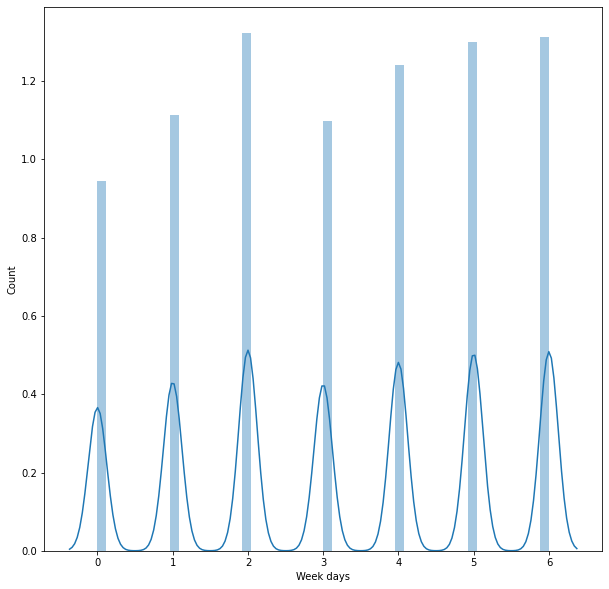

In [52]:
plt.figure(figsize = (10,10));
sns.distplot(data_frame['Day Code']);
plt.xlabel("Week days");
plt.ylabel("Count");

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


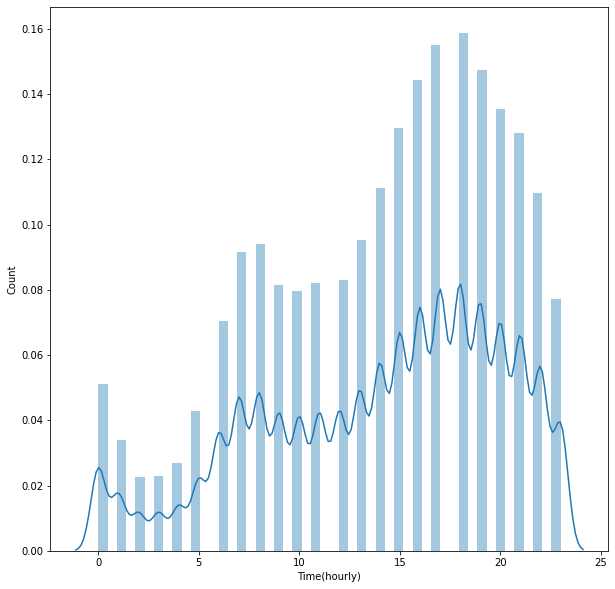

In [53]:
plt.figure(figsize = (10,10))
sns.distplot(data_frame["Time"])
plt.xlabel("Time(hourly)");
plt.ylabel("Count");

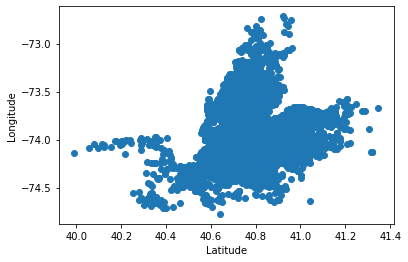

In [54]:
plt.scatter(data_frame['Lat'], data_frame['Lon']);
plt.xlabel("Latitude");
plt.ylabel("Longitude");